# gradient boosting model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('heart_dieseas.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#just want to correlation features vs target variable with corrwith
df.corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
dtype: float64

<AxesSubplot:title={'center':'corealtion with target'}>

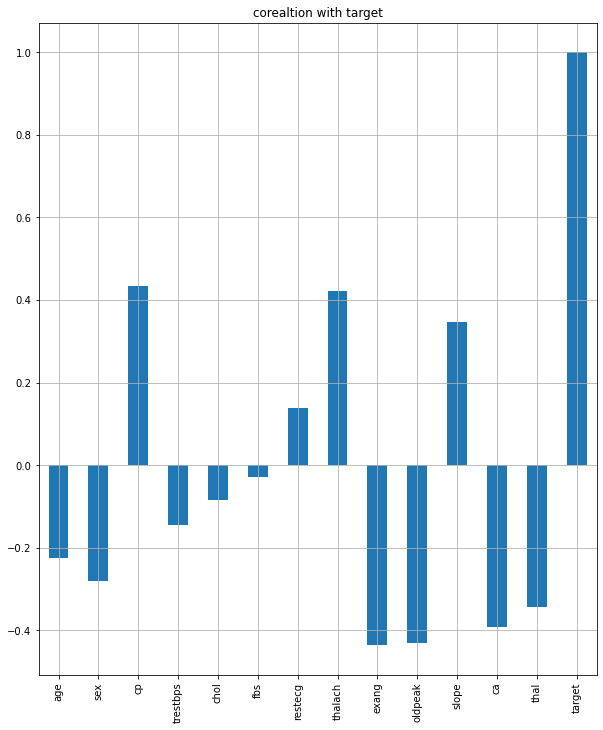

In [10]:
df.corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,12),title='corealtion with target')

# model building using selectpercentile features

In [11]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

#when we apply chi2 all select faetures if pvalue<0.5 is lessthan null hypothies reject there is a no relation b/w featrure and label

In [12]:
x = df.drop(['target'],axis=1)
y = df['target']

In [15]:
spercentile = SelectPercentile(score_func=chi2,percentile=80)

In [16]:
s_percentage = spercentile.fit(x,y)

In [17]:
#seperate the featurs
cols = spercentile.get_support(indices=True)
features = x.columns[cols]

In [18]:
print(cols)
print(features)

[ 0  1  2  3  4  7  8  9 10 11]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [23]:
df_scores = pd.DataFrame({'features':x.columns,'Chi2Score':spercentile.scores_,'pvalue':spercentile.pvalues_})


In [25]:
df_scores.sort_values(by='Chi2Score',ascending=False)

,features,Chi2Score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [26]:
#SUBSET OF DATA
x = df[features]
y = df.target

In [28]:
scaler = StandardScaler()

In [29]:
x_scaler = scaler.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.30,random_state=42)

# gradient bossting classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
gbdt =  RandomForestClassifier()

In [33]:
gbdt.fit(x_train,y_train)

RandomForestClassifier()

# testing

In [34]:
y_pred = gbdt.predict(x_test)

In [35]:
clf_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

In [37]:
print(f"accuracy_score {accuracy_score(y_test,y_pred) * 100:.2f}%")

accuracy_score 82.42%


In [38]:
print(clf_report)

                   0          1  accuracy  macro avg  weighted avg
precision   0.790698   0.854167  0.824176   0.822432      0.825571
recall      0.829268   0.820000  0.824176   0.824634      0.824176
f1-score    0.809524   0.836735  0.824176   0.823129      0.824475
support    41.000000  50.000000  0.824176  91.000000     91.000000


In [39]:
confusion_matrix(y_test,y_pred)

array([[34,  7],
       [ 9, 41]], dtype=int64)

# training

In [40]:
pred = gbdt.predict(x_train)

In [41]:
clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

In [42]:
print(f"accuracy_score {accuracy_score(y_train,pred) * 100:.2f}%")

accuracy_score 100.00%


In [43]:
print(clf_report)

              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0


In [44]:
confusion_matrix(y_train,pred)

array([[ 97,   0],
       [  0, 115]], dtype=int64)

# hyper parameter tunnig

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param = ({'max_depth':range(4,12,2),
         'min_samples_split':range(4,8,2)})

In [47]:
grid = GridSearchCV(gbdt,param_grid=param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [48]:
grid.best_params_

{'max_depth': 4, 'min_samples_split': 4}

In [49]:
gbdt1 =  GradientBoostingClassifier(max_depth = 4, min_samples_split = 4)

In [50]:
gbdt1.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=4)

In [51]:
y_pred = gbdt1.predict(x_train)

In [53]:
clf_report = pd.DataFrame(classification_report(y_train,y_pred,output_dict=True))

In [54]:
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,97.0,115.0,1.0,212.0,212.0


In [55]:
print(f"accuracy_score {accuracy_score(y_train,y_pred) * 100:.2f}%")

accuracy_score 100.00%


In [56]:
confusion_matrix(y_train,y_pred)

array([[ 97,   0],
       [  0, 115]], dtype=int64)

# testing

In [57]:
pred = gbdt1.predict(x_test)

In [58]:
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))

In [59]:
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.785714,0.836735,0.813187,0.811224,0.813747
recall,0.804878,0.820000,0.813187,0.812439,0.813187
f1-score,0.795181,0.828283,0.813187,0.811732,0.813369
support,41.000000,50.000000,0.813187,91.000000,91.000000


In [60]:
print(f"accuracy_score {accuracy_score(y_test,pred) * 100:.2f}%")

accuracy_score 81.32%


In [61]:
confusion_matrix(y_test,pred)

array([[33,  8],
       [ 9, 41]], dtype=int64)